In [36]:
print 'Hello jupyter notebook world!'

Hello jupyter notebook world!


Open and show an image

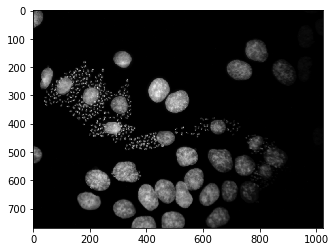

In [57]:
import numpy as np
from matplotlib.pyplot import imshow
from  skimage import filters, morphology, io, img_as_uint

image=io.imread('chagas.png')
imshow(image, cmap='gray')

A global manual threshold

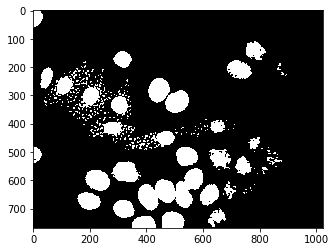

In [59]:
import numpy as np
from matplotlib.pyplot import imshow
from  skimage import filters, morphology, io, img_as_uint

threshold=40

image=io.imread('chagas.png')
binary=image>threshold
imshow(binary, cmap='gray')


Building the histogram

<Container object of 256 artists>

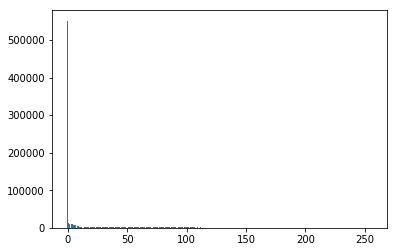

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from  skimage import filters, morphology, io, img_as_uint

#get histogram of an image
def getHistogram(gray_im):
    h=np.zeros(256, dtype=np.float32)
    for i in range(gray_im.shape[0]):
        for j in range(gray_im.shape[1]):
            h[gray_im[i,j]]+=1.0
    return h

image=io.imread('chagas.png')
h = getHistogram( image )
plt.bar(range(0,256), h)

Computing a threshold value with k-means

Starting...
Iteration 0
Cluster 0=12.5910482157
Cluster 1=137.842643805
Threshold=75.2168460105

Iteration 1
Cluster 0=6.55332885556
Cluster 1=97.9589996837
Threshold=52.2561642696

Iteration 2
Cluster 0=3.44497658132
Cluster 1=84.383261171
Threshold=43.9141188762

Iteration 3
Cluster 0=2.5011319162
Cluster 1=79.582025363
Threshold=41.0415786396

Iteration 4
Cluster 0=2.31609520039
Cluster 1=78.5492366378
Threshold=40.4326659191

Iteration 5
Cluster 0=2.23310041319
Cluster 1=78.0710247568
Threshold=40.152062585

Iteration 6
Cluster 0=2.23310041319
Cluster 1=78.0710247568
Threshold=40.152062585

Iteration 7
Cluster 0=2.23310041319
Cluster 1=78.0710247568
Threshold=40.152062585

Iteration 8
Cluster 0=2.23310041319
Cluster 1=78.0710247568
Threshold=40.152062585

Iteration 9
Cluster 0=2.23310041319
Cluster 1=78.0710247568
Threshold=40.152062585



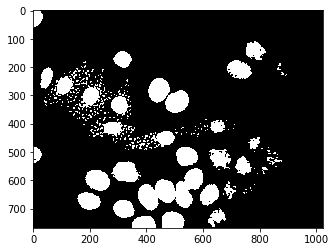

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from  skimage import filters, morphology, io, img_as_uint

#get histogram of an image
def getHistogram(gray_im):
    h=np.zeros(256, dtype=np.float32)
    for i in range(gray_im.shape[0]):
        for j in range(gray_im.shape[1]):
            h[gray_im[i,j]]+=1.0
    return h

#kmeans for k=2
def kmeans(histogram):
    print 'Starting...'
    k0=0
    k1=255
    
    for it in range(10):
        sumk0=0.0
        nk0=0
        sumk1=0.0
        nk1=0
        for i in range(256):
            if abs(i-k0) < abs(i-k1):
                sumk0=sumk0+i*histogram[i]
                nk0=nk0+histogram[i]
            else:
                sumk1=sumk1+i*histogram[i]
                nk1=nk1+histogram[i]    
    
        k0=sumk0/nk0
        k1=sumk1/nk1
        threshold = k0 + (k1-k0)/2
    
        print 'Iteration %s' % it
        print 'Cluster 0=%s' % k0
        print 'Cluster 1=%s' % k1
        print 'Threshold=%s' % threshold
        print ''
    return threshold

image=io.imread('chagas.png')
h = getHistogram( image )
threshold = kmeans(h)

binary=image>threshold
imshow(binary, cmap='gray')

Iterating over binary objects

Number of objects=336
Object 0, area=1720
Object 1, area=3149
Object 2, area=2754
Object 3, area=19
Object 4, area=4186
Object 5, area=42
Object 6, area=200
Object 7, area=41
Object 8, area=18
Object 9, area=2365
Object 10, area=31
Object 11, area=54
Object 12, area=48
Object 13, area=47
Object 14, area=23
Object 15, area=50
Object 16, area=86
Object 17, area=5
Object 18, area=1
Object 19, area=14
Object 20, area=95
Object 21, area=47
Object 22, area=10
Object 23, area=20
Object 24, area=25
Object 25, area=1
Object 26, area=30
Object 27, area=24
Object 28, area=51
Object 29, area=30
Object 30, area=32
Object 31, area=26
Object 32, area=71
Object 33, area=38
Object 34, area=2956
Object 35, area=31
Object 36, area=20
Object 37, area=27
Object 38, area=62
Object 39, area=36
Object 40, area=66
Object 41, area=4919
Object 42, area=29
Object 43, area=50
Object 44, area=56
Object 45, area=55
Object 46, area=25
Object 47, area=20
Object 48, area=27
Object 49, area=116
Object 50, area=1
Object 

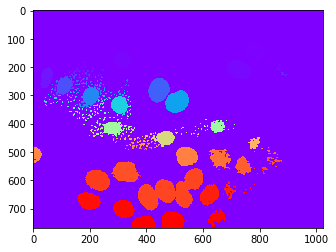

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from  skimage import filters, morphology, io, measure

#get histogram of an image
def getHistogram(gray_im):
    h=np.zeros(256, dtype=np.float32)
    for i in range(gray_im.shape[0]):
        for j in range(gray_im.shape[1]):
            h[gray_im[i,j]]+=1.0
    return h

#kmeans for k=2
def kmeans(histogram):
    k0=0
    k1=255
    
    for it in range(10):
        sumk0=0.0
        nk0=0
        sumk1=0.0
        nk1=0
        for i in range(256):
            if abs(i-k0) < abs(i-k1):
                sumk0=sumk0+i*histogram[i]
                nk0=nk0+histogram[i]
            else:
                sumk1=sumk1+i*histogram[i]
                nk1=nk1+histogram[i]    
    
        k0=sumk0/nk0
        k1=sumk1/nk1
        threshold = k0 + (k1-k0)/2

    return threshold

image=io.imread('chagas.png')
h = getHistogram( image )
threshold = kmeans(h)

binary=image>threshold
all_labels = measure.label(binary, background=0)
properties = measure.regionprops(all_labels)
print 'Number of objects=%s' % len(properties)
for i in range(0,len(properties)):
    print 'Object %s, area=%s' % (i, properties[i].area)

imshow(all_labels, cmap='rainbow')

For each object compute PCA, and the eccentricity index using moments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, io, measure
from scipy.spatial import Voronoi, voronoi_plot_2d

#get histogram of an image
def getHistogram(gray_im):
    h=np.zeros(256, dtype=np.float32)
    for i in range(gray_im.shape[0]):
        for j in range(gray_im.shape[1]):
            h[gray_im[i,j]]+=1.0
    return h

#kmeans for k=2
def kmeans(histogram):
    k0=0
    k1=255
    
    for it in range(10):
        sumk0=0.0
        nk0=0
        sumk1=0.0
        nk1=0
        for i in range(256):
            if abs(i-k0) < abs(i-k1):
                sumk0=sumk0+i*histogram[i]
                nk0=nk0+histogram[i]
            else:
                sumk1=sumk1+i*histogram[i]
                nk1=nk1+histogram[i]    
    
        k0=sumk0/nk0
        k1=sumk1/nk1
        threshold = k0 + (k1-k0)/2

    return threshold

def getmoments(x,y):
    meanx=np.mean(x)
    meany=np.mean(y)
    mu00=len(x)
    mu10=sum(x-meanx)
    mu01=sum(y-meany)
    mu11=sum((x-meanx)*(y-meany))
    mu20=sum((x-meanx)**2)
    mu02=sum((y-meany)**2)
    
    return mu00, mu10, mu01, mu11, mu20, mu02
    
image=io.imread('chagas.png')
h = getHistogram( image )
threshold = kmeans(h)

binary=image > threshold
all_labels = measure.label(binary, background=0)
properties = measure.regionprops(all_labels)
print 'Number of objects=%s' % len(properties)

centers=np.zeros((len(properties),2), 'float')

for i in range(0,len(properties)):
    coords = properties[i].coords
    mu00, mu10, mu01, mu11, mu20, mu02 =getmoments(coords[:,1], coords[:,0])
    covxx=mu20/mu00
    covyy=mu02/mu00
    covxy=mu11/mu00
    
    tr=covxx+covyy
    arg=(covxx-covyy)**2 + 4*covxy**2
    eigenvalue1=0.5*(tr+np.sqrt(arg))
    eigenvalue2=0.5*(tr-np.sqrt(arg))
    
    eccentricity=np.sqrt(1-eigenvalue2/eigenvalue1)
    centers[i,0]=(properties[i].centroid)[0]
    centers[i,1]=(properties[i].centroid)[1]

    print '%s: area=%s eccentricity=%s' % (i, mu00, eccentricity)

Number of objects=336
0: area=1720 eccentricity=0.824600198325
1: area=3149 eccentricity=0.493662930356
2: area=2754 eccentricity=0.376583919941
3: area=19 eccentricity=0.783213747562
4: area=4186 eccentricity=0.723706102015
5: area=42 eccentricity=0.825672562482
6: area=200 eccentricity=0.900787372426
7: area=41 eccentricity=0.818946187195
8: area=18 eccentricity=0.920194375891
9: area=2365 eccentricity=0.860713734489
10: area=31 eccentricity=0.873052832566
11: area=54 eccentricity=0.853846606123
12: area=48 eccentricity=0.870361079631
13: area=47 eccentricity=0.706603522251
14: area=23 eccentricity=0.93348375908
15: area=50 eccentricity=0.868449300791
16: area=86 eccentricity=0.864629203786
17: area=5 eccentricity=0.816496580928
18: area=1 eccentricity=nan
19: area=14 eccentricity=0.678393698847
20: area=95 eccentricity=0.757869151641
21: area=47 eccentricity=0.812374050784
22: area=10 eccentricity=0.790569415042
23: area=20 eccentricity=0.863426282784
24: area=25 eccentricity=0.7990

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
